# Hello Pretrained ResNet-50

Use pretrained ResNet-50 from Keras Applications

In [1]:
# Prerequisites
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers

### Download ResNet-50 Model trained for Imagenet

In [2]:
model = keras.applications.ResNet50(weights="imagenet")

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


### ResNet expects images to be 224x224

In [18]:
from sklearn.datasets import load_sample_images

# load_sample_images()["images"] returns 2 hardcoded images in a Python list. Keras does not 
# accept Python lists anymore, convert the list to a tensor with tf.constant()
K = keras.backend
images = K.constant(load_sample_images()["images"])
images_224px = keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True)(images)

### Preprocess Images as needed by the pretrained model

In [14]:
inputs = keras.applications.resnet50.preprocess_input(images_224px)
print("Input shape:", inputs.shape)

Input shape: (2, 224, 224, 3)


### Predict

In [19]:
y_probabilities = model.predict(inputs)
print("prediction shape: ", y_probabilities.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
prediction shape:  (2, 1000)


Prediction percentages are for 1000 classes

### Decode Top-K Predictions

In [16]:
top_K = keras.applications.resnet50.decode_predictions(y_probabilities, top=5)
for image_index in range(len(images)):
    print(f"Image #{image_index}")
    for class_id, name, y_proba in top_K[image_index]:
        print(f"  {class_id} - {name:12s} {y_proba:.2%}")

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
Image #0
  n03877845 - palace       54.69%
  n03781244 - monastery    24.71%
  n02825657 - bell_cote    18.55%
  n02980441 - castle       0.77%
  n04346328 - stupa        0.36%
Image #1
  n04522168 - vase         32.67%
  n11939491 - daisy        17.82%
  n03530642 - honeycomb    12.04%
  n13040303 - stinkhorn    4.33%
  n07930864 - cup          4.21%


### Display the 2 Sample images (Palace and Dahlia)

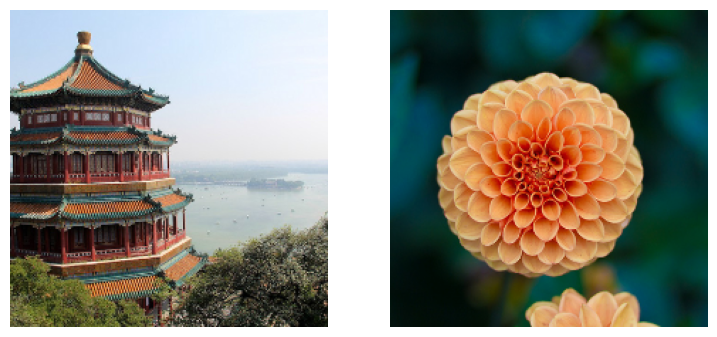

In [17]:
plt.figure(figsize=(9, 6))
for idx in (0, 1):
    plt.subplot(1, 2, idx + 1)
    plt.imshow(images_224px[idx] / 255)
    plt.axis("off")

plt.show()